## Machine Learning 
Supervised and Unsupervised learning are the two techniques of machine learning. But both the techniques are used in different scenarios and with different datasets.

### Supervised Machine Learning:
Supervised learning is a machine learning method in which models are trained using labeled data. In supervised learning, models need to find the mapping function to map the input variable (X) with the output variable (Y).
Supervised learning needs supervision to train the model, which is similar to as a student learns things in the presence of a teacher. Supervised learning can be used for two types of problems: Classification and Regression.

### Unsupervised Machine Learning:
Unsupervised learning is another machine learning method in which patterns inferred from the unlabeled input data. The goal of unsupervised learning is to find the structure and patterns from the input data. Unsupervised learning does not need any supervision. Instead, it finds patterns from the data by its own.
Unsupervised Learning can be classified in Clustering and Associations problems.
Unsupervised learning can be used for those cases where we have only input data and no corresponding output data.

In [1]:
#import header files 
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [2]:
#%% preprocessing
#loading data
df = pd.read_table('C:/Users/jeslu/Downloads/4_PersonalComfort/raw_data_Liu.csv', sep=',', delimiter=None, header='infer')
df

,ID,Sex,Age,Height,Weight,ColdSens,ColdExp,Workhr,Coffeeintake,Vote_time,...,sd.PantT_60,mean.act_5,grad.act_5,sd.act_5,mean.act_15,grad.act_15,sd.act_15,mean.act_60,grad.act_60,sd.act_60
0,3,Male,31,1.70,55.0,3.5,1.6,4.0,0.0,5/1/2017 10:10,...,1.307633,NaN,NaN,NaN,9.145558,0.013805,1.663009,9.126026,3.282967e-03,1.045788e+00
1,3,Male,31,1.70,55.0,3.5,1.6,4.0,0.0,5/1/2017 10:35,...,1.156287,7.036822,NaN,NaN,7.036822,NaN,NaN,9.249029,1.246707e-01,8.194081e-01
2,3,Male,31,1.70,55.0,3.5,1.6,4.0,0.0,5/1/2017 11:40,...,0.264076,9.249484,0.000001,0.000001,9.249484,0.000001,0.000001,9.090590,-2.016959e-02,8.859536e-01
3,3,Male,31,1.70,55.0,3.5,1.6,4.0,0.0,5/1/2017 12:00,...,0.169724,NaN,NaN,NaN,9.249485,NaN,NaN,9.249485,-1.690000e-07,6.500000e-07
4,3,Male,31,1.70,55.0,3.5,1.6,4.0,0.0,5/1/2017 12:07,...,0.530148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,12,Male,21,1.75,61.0,3.0,0.0,1.8,0.0,12/18/2016 19:10,...,0.124342,NaN,NaN,NaN,NaN,NaN,NaN,10.664267,-4.960000e-07,1.190000e-06
3839,12,Male,21,1.75,61.0,3.0,0.0,1.8,0.0,12/18/2016 21:15,...,0.195692,NaN,NaN,NaN,NaN,NaN,NaN,9.329686,-1.751793e-02,4.450424e-01
3840,12,Male,21,1.75,61.0,3.0,0.0,1.8,0.0,12/18/2016 23:00,...,0.232131,NaN,NaN,NaN,NaN,NaN,NaN,10.769410,NaN,NaN
3841,12,Male,21,1.75,61.0,3.0,0.0,1.8,0.0,12/19/2016 1:17,...,0.717077,NaN,NaN,NaN,10.553272,NaN,0.620557,9.850867,3.036039e-02,1.301096e+00


In [3]:
#taking indoor values 
df=df[df.location!=-1]
df

,ID,Sex,Age,Height,Weight,ColdSens,ColdExp,Workhr,Coffeeintake,Vote_time,...,sd.PantT_60,mean.act_5,grad.act_5,sd.act_5,mean.act_15,grad.act_15,sd.act_15,mean.act_60,grad.act_60,sd.act_60
0,3,Male,31,1.70,55.0,3.5,1.6,4.0,0.0,5/1/2017 10:10,...,1.307633,NaN,NaN,NaN,9.145558,0.013805,1.663009,9.126026,3.282967e-03,1.045788e+00
1,3,Male,31,1.70,55.0,3.5,1.6,4.0,0.0,5/1/2017 10:35,...,1.156287,7.036822,NaN,NaN,7.036822,NaN,NaN,9.249029,1.246707e-01,8.194081e-01
2,3,Male,31,1.70,55.0,3.5,1.6,4.0,0.0,5/1/2017 11:40,...,0.264076,9.249484,0.000001,0.000001,9.249484,0.000001,0.000001,9.090590,-2.016959e-02,8.859536e-01
3,3,Male,31,1.70,55.0,3.5,1.6,4.0,0.0,5/1/2017 12:00,...,0.169724,NaN,NaN,NaN,9.249485,NaN,NaN,9.249485,-1.690000e-07,6.500000e-07
4,3,Male,31,1.70,55.0,3.5,1.6,4.0,0.0,5/1/2017 12:07,...,0.530148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,12,Male,21,1.75,61.0,3.0,0.0,1.8,0.0,12/18/2016 19:10,...,0.124342,NaN,NaN,NaN,NaN,NaN,NaN,10.664267,-4.960000e-07,1.190000e-06
3839,12,Male,21,1.75,61.0,3.0,0.0,1.8,0.0,12/18/2016 21:15,...,0.195692,NaN,NaN,NaN,NaN,NaN,NaN,9.329686,-1.751793e-02,4.450424e-01
3840,12,Male,21,1.75,61.0,3.0,0.0,1.8,0.0,12/18/2016 23:00,...,0.232131,NaN,NaN,NaN,NaN,NaN,NaN,10.769410,NaN,NaN
3841,12,Male,21,1.75,61.0,3.0,0.0,1.8,0.0,12/19/2016 1:17,...,0.717077,NaN,NaN,NaN,10.553272,NaN,0.620557,9.850867,3.036039e-02,1.301096e+00


In [4]:
#Finding corelation of x with y = therm_sensation
cor_positive=df.corr()['therm_sens'].sort_values(ascending=False)
cor_n=df.corr()['therm_sens'].sort_values()

print(cor_positive)

therm_sens              1.000000
mean.Temperature_60     0.203273
mean.Temperature_480    0.201361
mean.AnkleT_5           0.200211
mean.AnkleT_15          0.182555
                          ...   
mean.Humidity_480      -0.082064
mean.Humidity_60       -0.083452
Weight                 -0.109225
therm_pref             -0.634999
location                     NaN
Name: therm_sens, Length: 80, dtype: float64


In [5]:

#cleaning data 
df_nona = df.dropna() 
df_nona

,ID,Sex,Age,Height,Weight,ColdSens,ColdExp,Workhr,Coffeeintake,Vote_time,...,sd.PantT_60,mean.act_5,grad.act_5,sd.act_5,mean.act_15,grad.act_15,sd.act_15,mean.act_60,grad.act_60,sd.act_60
7,3,Male,31,1.70,55.0,3.5,1.6,4.0,0.0,5/1/2017 13:38,...,1.235298,9.141392,-0.591981,0.583537,8.917643,-8.750443e-03,0.509274,8.950168,-9.079114e-03,1.038599
18,3,Male,31,1.70,55.0,3.5,1.6,4.0,0.0,5/1/2017 20:27,...,0.781540,8.570368,-0.083275,0.325701,8.570400,-8.323942e-02,0.325712,8.641821,-9.646817e-03,0.330427
85,3,Male,31,1.70,55.0,3.5,1.6,4.0,0.0,5/4/2017 17:29,...,3.447912,9.123580,-0.032991,0.481596,9.123580,-3.299052e-02,0.481596,9.123580,-3.299052e-02,0.481596
87,3,Male,31,1.70,55.0,3.5,1.6,4.0,0.0,5/4/2017 19:33,...,0.091740,11.342659,0.000664,0.000509,9.625440,-4.414885e-02,1.113857,9.518716,3.307105e-02,1.195889
88,3,Male,31,1.70,55.0,3.5,1.6,4.0,0.0,5/4/2017 19:50,...,0.791810,9.949952,-0.401132,1.777182,9.504917,9.613006e-02,1.569971,9.504917,9.613006e-02,1.569971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694,12,Male,21,1.75,61.0,3.0,0.0,1.8,0.0,12/3/2016 22:50,...,0.110210,9.843919,-0.018850,0.083587,9.821491,5.924639e-03,0.227579,9.821491,5.924639e-03,0.227579
3695,12,Male,21,1.75,61.0,3.0,0.0,1.8,0.0,12/3/2016 23:55,...,0.454170,9.732385,-0.001746,0.046817,9.745109,-1.539609e-03,0.049253,9.725413,1.308120e-04,0.053885
3720,12,Male,21,1.75,61.0,3.0,0.0,1.8,0.0,12/5/2016 13:50,...,4.323107,9.863996,0.080630,0.648429,9.863996,8.063003e-02,0.648429,9.855349,-7.215780e-04,0.535442
3726,12,Male,21,1.75,61.0,3.0,0.0,1.8,0.0,12/5/2016 19:44,...,0.026283,9.844890,-0.002840,0.053323,9.853632,-2.561102e-03,0.049940,9.876090,-2.415851e-03,0.072257


In [6]:
# assigning x and y values 
df_set1= df_nona[['ID','mean.WristT_5', 'mean.Temperature_60','mean.Humidity_60', 'therm_pref']]
y_set1= df_set1['therm_pref'].values
y_set1=y_set1.astype(float)
x_set1=df_set1.drop(columns=['therm_pref'])
print(y_set1)
print(x_set1)

[ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.
  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0. -1.
  0.  1.  0. -1. -1. -1.  0.  1.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  1.  1.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1. -1. -1.  1.  1. -1. -1.  0. -1. -1.  1.  1.  1.  0.  0.
 -1.  0. -1. -1.  1.  0.  0.  0. -1.  0.  0.  0. -1. -1.  0. -1.  0.  0.
  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0. -1.  1.  0. -1.  0.  0.  0.  0.  0.  0.  0. -1.  0. -1. -1.  0.
  0.  0. -1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0. -1.  0. -1.  0. -1.  0.  0.  0. -1.  0.  0.
  0. -1.  1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

### Z-Score Normalization
Z-Score value is to understand how far the data point is from the mean. Technically, it measures the standard deviations below or above the mean. 

It ranges from -3 standard deviation up to +3 standard deviation.
Z-score normalization in data mining is useful for those kinds of data analysis wherein there is a need to compare a value with respect to a mean(average) value, such as results from tests or surveys. 

Thus, Z-score normalization is also popularly known as Standardization. 

The following formula is used in the case of z-score normalization on every single value of the dataset.

New value = (x – μ) / σ

Here: 

x: Original value
 μ: Mean of data
 σ: Standard deviation of data

In [7]:
#normalizing x
x_set1= stats.zscore(x_set1)
x_set1

,ID,mean.WristT_5,mean.Temperature_60,mean.Humidity_60
7,-1.189144,1.115364,2.855250,-2.722746
18,-1.189144,1.181595,1.924272,-1.474675
85,-1.189144,0.016866,-0.109636,0.601536
87,-1.189144,1.122723,-0.666171,1.182812
88,-1.189144,0.359394,-0.881844,1.363386
...,...,...,...,...
3694,1.208881,0.205899,-0.409595,-0.519743
3695,1.208881,0.150747,-0.569490,-0.272099
3720,1.208881,0.361160,-0.937622,0.821664
3726,1.208881,-0.189801,-1.249976,0.954331


### Train test split 

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

Train Dataset: Used to fit the machine learning model.
Test Dataset: Used to evaluate the fit machine learning model.
The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

This is how we expect to use the model in practice. Namely, to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have the expected output or target values.

The train-test procedure is appropriate when there is a sufficiently large dataset available.
There is no optimal split percentage.

You must choose a split percentage that meets your project’s objectives with considerations that include:

Computational cost in training the model.
Computational cost in evaluating the model.
Training set representativeness.
Test set representativeness.
Nevertheless, common split percentages include:

Train: 80%, Test: 20%
Train: 67%, Test: 33%
Train: 50%, Test: 50%

In [96]:
#train test split 
x_train, x_test, y_train, y_test = train_test_split( x_set1, y_set1, test_size=0.20,random_state=50)
y_train=y_train.astype(float)
y_test=y_test.astype(float)

In [ ]:
#Regression
reg = LinearRegression().fit(x_train, y_train)
p_lr_train=reg.predict(x_train)
p_lr_test=reg.predict(x_test)
print (p_lr_test)

In [ ]:
# model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print(
  'mean_squared_error for regression: ', mean_squared_error(y_test, p_lr_test))
print(
  'mean_absolute_error for regression: ', mean_absolute_error(y_test, p_lr_test))
print ('R2 error for regression : ', r2_score(y_test, p_lr_test))

### Decision Tree
How to split the nodes
Greedy approach: 
– Nodes with homogeneous class distribution 
are preferred
● Need a measure of node impurity
Measures of Node Impurity
● Gini Index
● Entropy
    Entropy(t)= p( j | t)log2 p( j | t)
    p( j | t) is the relative frequency of class j at node t
● Misclassification error


In [97]:
#Decision Tree 
entropy=DecisionTreeClassifier(criterion="entropy", min_samples_split=200)
entropy.fit(x_train,y_train)
p_dttrain=entropy.predict(x_train)
p_dttest=entropy.predict(x_test)
p_dttest

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [98]:
# model evaluation
a_dt_train= accuracy_score(y_train,p_dttrain)
a_dt_test = accuracy_score(y_test,p_dttest)
print ("accuracy for decision tree = ",a_dt_test)

accuracy for decision tree =  0.7037037037037037


### Random Forest
Random forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.
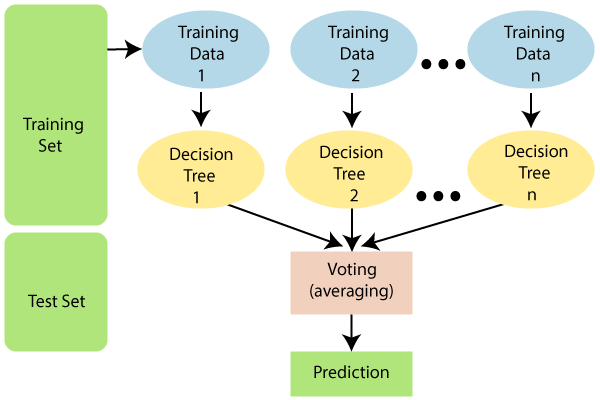

It takes less training time as compared to other algorithms.
It predicts output with high accuracy, even for the large dataset it runs efficiently.
It can also maintain accuracy when a large proportion of data is missing.


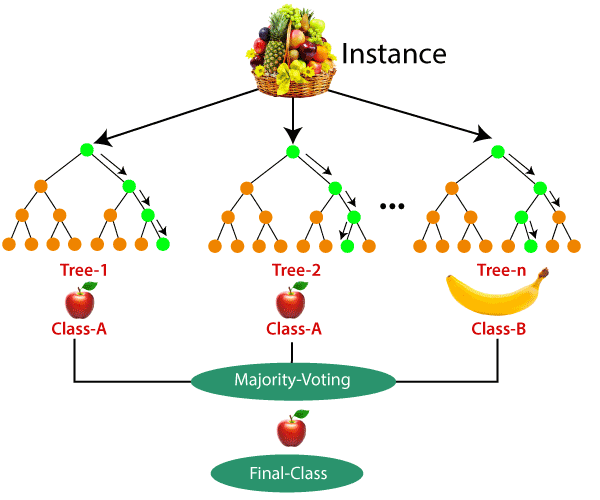

In [15]:
#Random Forest classifier
clf=RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(x_train,y_train)
p_rftrain=clf.predict(x_train)
p_rftest=clf.predict(x_test)


In [16]:
#Evaluation
a_rf_train= accuracy_score(y_train,p_rftrain)
a_rf_test = accuracy_score(y_test,p_rftest)
print ("Test accuracy of Random forest classifier = ", a_rf_test)

Test accuracy of Random forest classifier =  0.7592592592592593


### Support Vector Machine Algorithm
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:
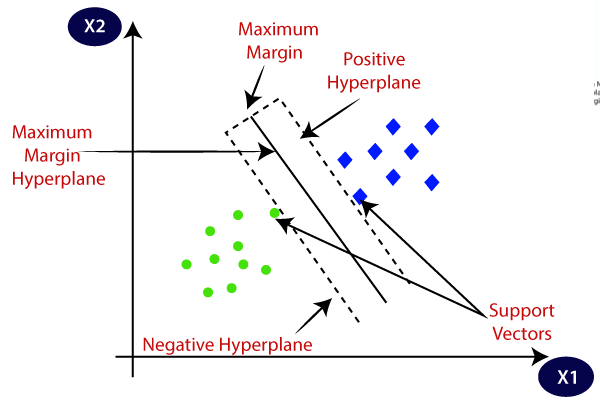


In [17]:
clfsvm = svm.SVC(decision_function_shape='ovo')  # one vs one classification
clfsvm.fit(x_train, y_train)
p_svmtrain=clfsvm.predict(x_train)
p_svmtest=clfsvm.predict(x_test)
print (p_svmtest)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [18]:
a_svm_train= accuracy_score(y_train,p_svmtrain)
a_svm_test = accuracy_score(y_test,p_svmtest)

print("test accuracy for Support vector machine is ", a_svm_test)

test accuracy for Support vector machine is  0.7037037037037037


In [19]:
clfr = svm.SVC(decision_function_shape='ovr')  # one vs one rest
clfr.fit(x_train, y_train)
p_svmrtrain=clfr.predict(x_train)
p_svmrtest=clfr.predict(x_test)
print (p_svmrtest)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [20]:
a_svmr_train= accuracy_score(y_train,p_svmrtrain)
a_svmr_test = accuracy_score(y_test,p_svmrtest)

print("test accuracy for Support vector machine is ", a_svmr_test)

test accuracy for Support vector machine is  0.7037037037037037


### K-Nearest Neighbor(KNN) Algorithm
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.

K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

In [37]:
neigh=KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train,y_train)
p_ktrain=neigh.predict(x_train)
p_ktest=neigh.predict(x_test)


In [38]:
a_knn_train= accuracy_score(y_train,p_ktrain)
a_knn_test = accuracy_score(y_test,p_ktest)
print("test accuracy for KNN model is", a_knn_test)

test accuracy for KNN model is 0.7407407407407407


###  Multi-Layer Perceptron Neural Networks

The field of artificial neural networks is often just called neural networks or multi-layer perceptrons after perhaps the most useful type of neural network. A perceptron is a single neuron model that was a precursor to larger neural networks.

It is a field that investigates how simple models of biological brains can be used to solve difficult computational tasks like the predictive modeling tasks we see in machine learning. The goal is not to create realistic models of the brain but instead to develop robust algorithms and data structures that we can use to model difficult problems.

The power of neural networks comes from their ability to learn the representation in your training data and how best to relate it to the output variable you want to predict. In this sense, neural networks learn mapping. Mathematically, they are capable of learning any mapping function and have been proven to be a universal approximation algorithm.

The predictive capability of neural networks comes from the hierarchical or multi-layered structure of the networks. The data structure can pick out (learn to represent) features at different scales or resolutions and combine them into higher-order features, for example, from lines to collections of lines to shapes.

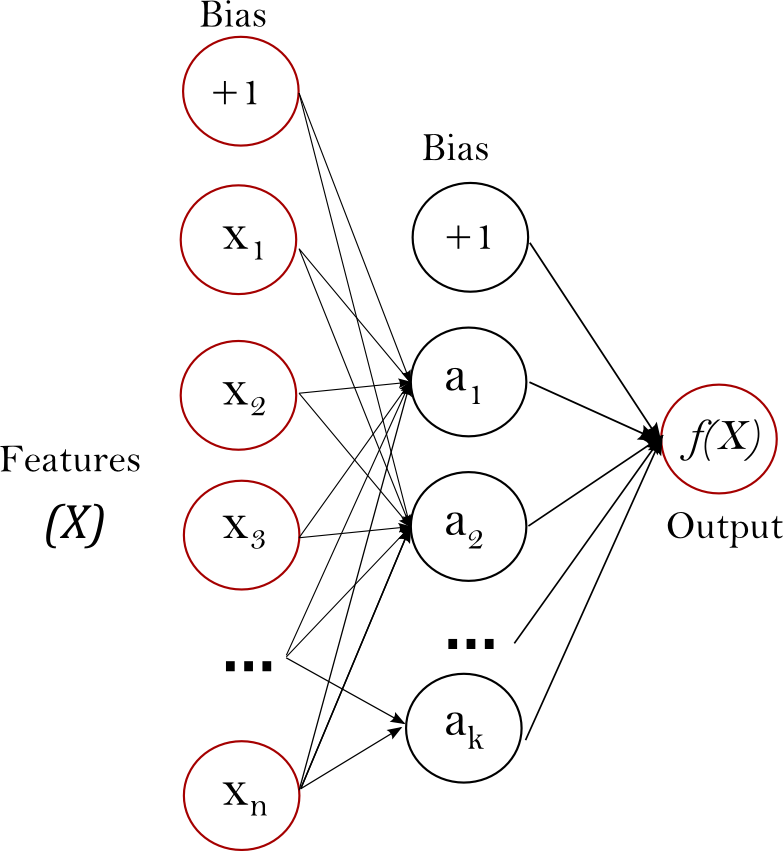

In [49]:
#MLP
nn=MLPClassifier(hidden_layer_sizes=(800,500), activation='relu', solver='sgd',  batch_size=16, learning_rate_init=0.01, max_iter=1000, shuffle=True, random_state=None)
nn.fit(x_train,y_train)
prediction_train = nn.predict(x_train)
prediction_test = nn.predict(x_test)



In [50]:
a_nn_train=accuracy_score(y_train,prediction_train)
a_nn_test=accuracy_score(y_test,prediction_test)
print("test accuracy = ",a_nn_test)

test accuracy =  0.6296296296296297


In [62]:
#MLP
nntanh=MLPClassifier(hidden_layer_sizes=(800,500), activation='tanh', solver='sgd',  batch_size=16, learning_rate_init=0.01, max_iter=1000, shuffle=True, random_state=None)
nntanh.fit(x_train,y_train)
prediction_nn2_train = nntanh.predict(x_train)
prediction_nn2_test = nntanh.predict(x_test)


In [63]:
a_nntanh_train=accuracy_score(y_train,prediction_nn2_train)
a_nntanh_test=accuracy_score(y_test,prediction_nn2_test)
print("test accuracy = ",a_nntanh_test)

test accuracy =  0.7037037037037037


In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, learning_rate=1, algorithm="SAMME", random_state=0)
clf.fit(x_train, y_train)
#AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=0)
adaboost_train = clf.predict(x_train)
adaboost_test = clf.predict(x_test)
ada_train_accuracy = accuracy_score(y_train, adaboost_train)
ada_test_accuracy = accuracy_score(y_test, adaboost_test)
print (ada_test_accuracy)


0.7222222222222222


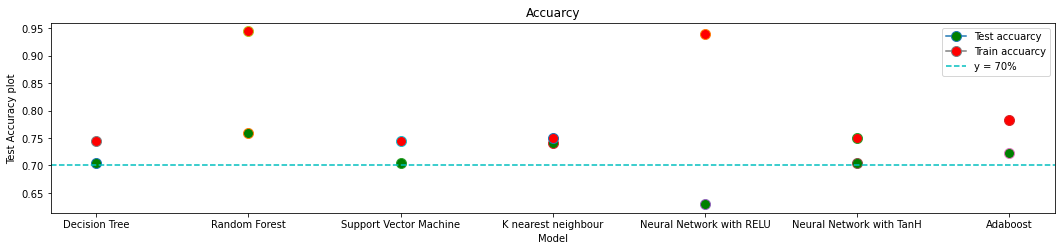

In [90]:
#finding the best classifier 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [18.00, 3.50]

plt.xlabel('Model')
plt.ylabel('Test Accuracy plot')

plt.plot("Decision Tree",a_dt_test, marker="o", markersize=10, markerfacecolor="green", label="Test accuarcy")
plt.plot("Random Forest",a_rf_test, marker="o", markersize=10, markerfacecolor="green")
plt.plot("Support Vector Machine",a_svm_test, marker="o", markersize=10, markerfacecolor="green")
plt.plot("K nearest neighbour",a_knn_test, marker="o", markersize=10, markerfacecolor="green")
plt.plot("Neural Network with RELU",a_nn_test, marker="o", markersize=10, markerfacecolor="green")
plt.plot("Neural Network with TanH",a_nntanh_test, marker="o", markersize=10, markerfacecolor="green")
plt.plot("Adaboost",ada_test_accuracy, marker="o", markersize=10, markerfacecolor="green")

plt.plot("Decision Tree",a_dt_train, marker="o", markersize=10, markerfacecolor="red", label="Train accuarcy")
plt.plot("Random Forest",a_rf_train, marker="o", markersize=10, markerfacecolor="red")
plt.plot("Support Vector Machine",a_svm_train, marker="o", markersize=10, markerfacecolor="red")
plt.plot("K nearest neighbour",a_knn_train, marker="o", markersize=10, markerfacecolor="red")
plt.plot("Neural Network with RELU",a_nn_train, marker="o", markersize=10, markerfacecolor="red")
plt.plot("Neural Network with TanH",a_nntanh_train, marker="o", markersize=10, markerfacecolor="red")
plt.plot("Adaboost",ada_train_accuracy, marker="o", markersize=10, markerfacecolor="red")

#plt.axhline(y=0.7, color='r', linestyle='--', label='y = 70%')

plt.title('Accuarcy')
plt.legend(prop={'size': 10})
plt.show()


In [ ]:
#Predicting using Radom Forest classifier 
predicted=clf.predict(np.array([[-1.189144,1.181595,1.924272,-1.474675]]))
print(predicted)

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers